In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import random

# Importing Library for Data Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow

# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting
%matplotlib inline

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Deep Learning CNN model to recognize ball
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

TrainingImagePath='/content/drive/MyDrive/train'
TestingImagePath='/content/drive/MyDrive/test'
ValidationImagePath='/content/drive/MyDrive/valid'


In [ ]:
# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [ ]:
# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 650 images belonging to 13 classes.


In [ ]:
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 65 images belonging to 13 classes.


In [ ]:
# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 65 images belonging to 13 classes.


In [ ]:
# Function to plot a fixed number of images for each class
def showImages(class_name, num_images=5):
    folder_path = os.path.join(TrainingImagePath, class_name)
    image_files = os.listdir(folder_path)
    image_files = random.sample(image_files, min(num_images, len(image_files)))
    for idx, file_name in enumerate(image_files):
        plt.subplot(1, num_images, idx+1)
        image_path = os.path.join(folder_path, file_name)
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

In [ ]:
# Function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

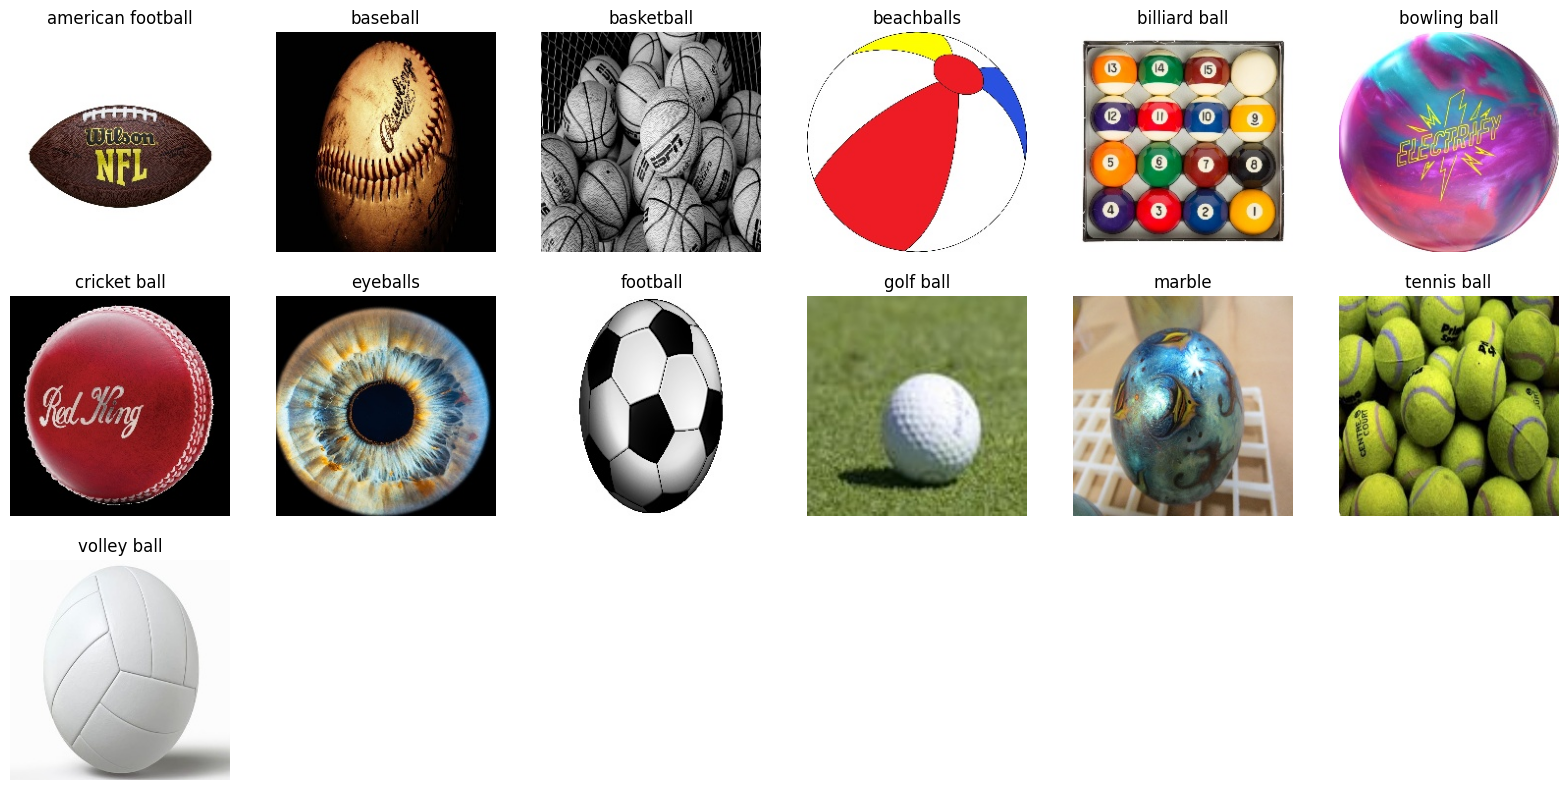

In [ ]:
plt.figure(figsize=(20, 20))
for labels, number in training_set.class_indices.items():  #labels will represent the class name.number will represent the numerical index of that class.
    plt.subplot(6, 6, number+1)
    showImages(labels)


In [ ]:
# Printing class labels for each face
test_set.class_indices

{'american football': 0,
 'baseball': 1,
 'basketball': 2,
 'beachballs': 3,
 'billiard ball': 4,
 'bowling ball': 5,
 'cricket ball': 6,
 'eyeballs': 7,
 'football': 8,
 'golf ball': 9,
 'marble': 10,
 'tennis ball': 11,
 'volley ball': 12}

In [ ]:
#Creating lookup table for all balls
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

# Saving the face map for future reference
import pickle
with open(R"E:\Data Sets\Balls Classification\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'american football', 1: 'baseball', 2: 'basketball', 3: 'beachballs', 4: 'billiard ball', 5: 'bowling ball', 6: 'cricket ball', 7: 'eyeballs', 8: 'football', 9: 'golf ball', 10: 'marble', 11: 'tennis ball', 12: 'volley ball'}

 The Number of output neurons:  13


In [ ]:
 #Create CNN deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

# ADDITIONAL LAYER of CONVOLUTION for better accuracy
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minute')

Epoch 1/20


<ipython-input-30-9d02dbfea718>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


21/21 [==============================] - 15s 686ms/step - loss: 0.3706 - accuracy: 0.8877 - val_loss: 0.9729 - val_accuracy: 0.7385
Epoch 2/20
21/21 [==============================] - 15s 674ms/step - loss: 0.3602 - accuracy: 0.8954 - val_loss: 0.7932 - val_accuracy: 0.7692
Epoch 3/20
21/21 [==============================] - 15s 718ms/step - loss: 0.3031 - accuracy: 0.9108 - val_loss: 0.8229 - val_accuracy: 0.7231
Epoch 4/20
21/21 [==============================] - 14s 698ms/step - loss: 0.2521 - accuracy: 0.9185 - val_loss: 0.8374 - val_accuracy: 0.7385
Epoch 5/20
21/21 [==============================] - 14s 657ms/step - loss: 0.1739 - accuracy: 0.9446 - val_loss: 1.0723 - val_accuracy: 0.7077
Epoch 6/20
21/21 [==============================] - 14s 653ms/step - loss: 0.1967 - accuracy: 0.9400 - val_loss: 1.2381 - val_accuracy: 0.7385
Epoch 7/20
21/21 [==============================] - 14s 664ms/step - loss: 0.1583 - accuracy: 0.9523 - val_loss: 0.9572 - val_accuracy: 0.7846
Epoch 8/20

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

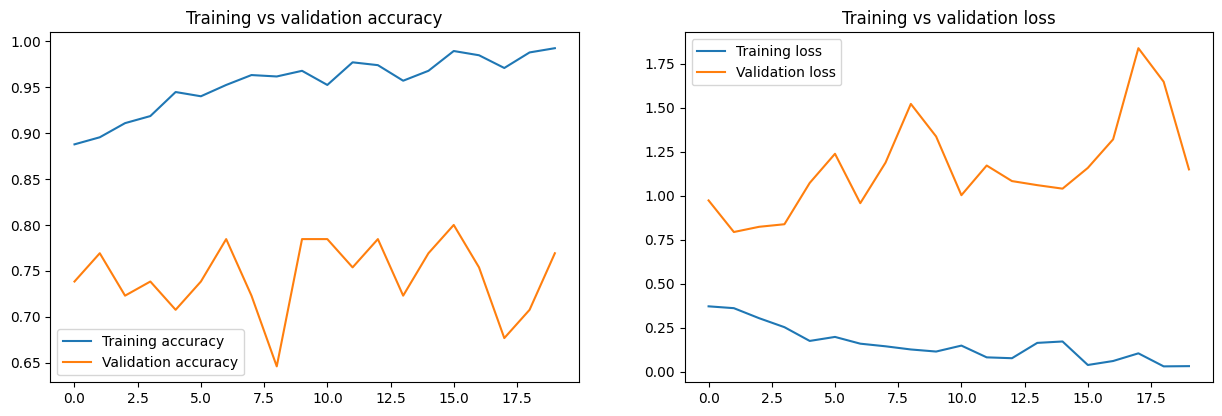

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [ ]:
import joblib

# Assuming 'classifier' is your Keras model
classifier.save('my_model.h5')  # Save the model in HDF5 format

# Save the model as a pickle file using joblib
joblib.dump(classifier, 'classifier.pkl')


['classifier.pkl']

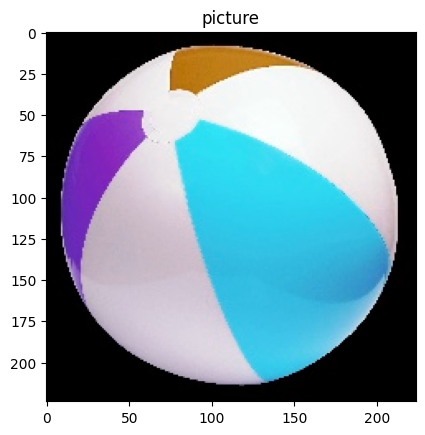

Prediction is: beachballs


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Corrected file path without single quotes and using proper escape sequences
testImage = "/content/drive/My Drive/test/beachballs/1.jpg"

# Load and preprocess the test image
test_image = load_img(testImage, target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make predictions on the test image
result = classifier.predict(test_image, verbose=0)

# Display the test image
img = cv2.imread(testImage)
plt.imshow(img)
plt.title('picture')
plt.show()

print('Prediction is:', ResultMap[np.argmax(result)])
